# Exploring the Latest Dataset from Lyft-Bikes (06/2020)
## by Juan Garcia

## Investigation Overview

In this slide deck we will be analyzing the latest dataset from lyft Bikes (06/2020) in San Francisco Bay. The goal of the analysis is to explain the variation in the average riding time of a customer. 

## Dataset Overview

The dataset can be found on the lift webesite - [just follow this link](https://s3.amazonaws.com/baywheels-data/index.html). It contains more than 100 Tsd. anonymized entries - each for the renting of a bike. Our variables of interest are:
- The time spent riding (ride duration)
- The hour of the day in which the customer rented the bike (hour of day)
- The day of the week in which the customer rented the bike (week day)
- The type of the customer (member or casual)
- The type of the bike (electric or standard)

Other variables that could explain the variation on the ride duration, such as weather, neighborhood, special offers and so on, are not included in this analysis and remain open for furhter research 

In [5]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('202006-baywheels-tripdata_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Variation of the ride duration depending on the day of the week and the customer type

The duration of a ride seems to be dependent on the type of the customer (member or casual) independent of the day of the week. However, we see an increase in the times a customer spends riding the bike over the weekends. This cannot be said for the weekdays. For further analysis we will differentiate only between weekdays (Mon-Fri) and weekends (Sat-Sun)

In [6]:
# choose colors for the two features
base_color_btype = sns.color_palette()[0]
base_color_ctype = sns.color_palette()[1]
base_color_day = sns.color_palette()[2]
base_color_hour = sns.color_palette()[4]

In [8]:
# change data type to category since the days follow an order
day_order = ['Monday', 
             'Tuesday',
             'Wednesday',
             'Thursday',
             'Friday',
             'Saturday',
             'Sunday']
ordered_day = pd.api.types.CategoricalDtype(ordered=True, categories=day_order)
df_clean['week_day'] = df_clean['week_day'].astype(ordered_day)

# same for the hour of the day
order_hour = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23]
hour_ordered = pd.api.types.CategoricalDtype(ordered=True, categories=order_hour)
df_clean.hour_of_day = df_clean.hour_of_day.astype(hour_ordered)

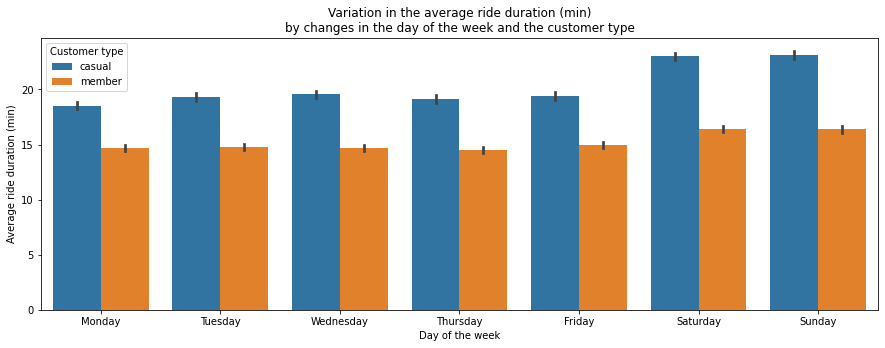

In [10]:
plt.figure(figsize=[15,5])

colors = {'casual': base_color_btype, 'member': base_color_ctype}
sns.barplot(data=df_clean, hue='member_casual', palette=colors, x='week_day', 
                y='ride_dur')
plt.ylabel('Average ride duration (min)')
plt.xlabel('Day of the week')
plt.title('Variation in the average ride duration (min)\nby changes in the day of the week and the customer type')
plt.legend(title='Customer type');

## Variation in the ride duration depending on the hour of the day and the customer type

As expected, the type of customer seems to have an impact in the ride duration independent of the time of the day the bike is rented. It seems on average, that casual cusotmers ride longer than members. However, there is high variation during "rush hours" where casual customers tend to ride much longer than members.

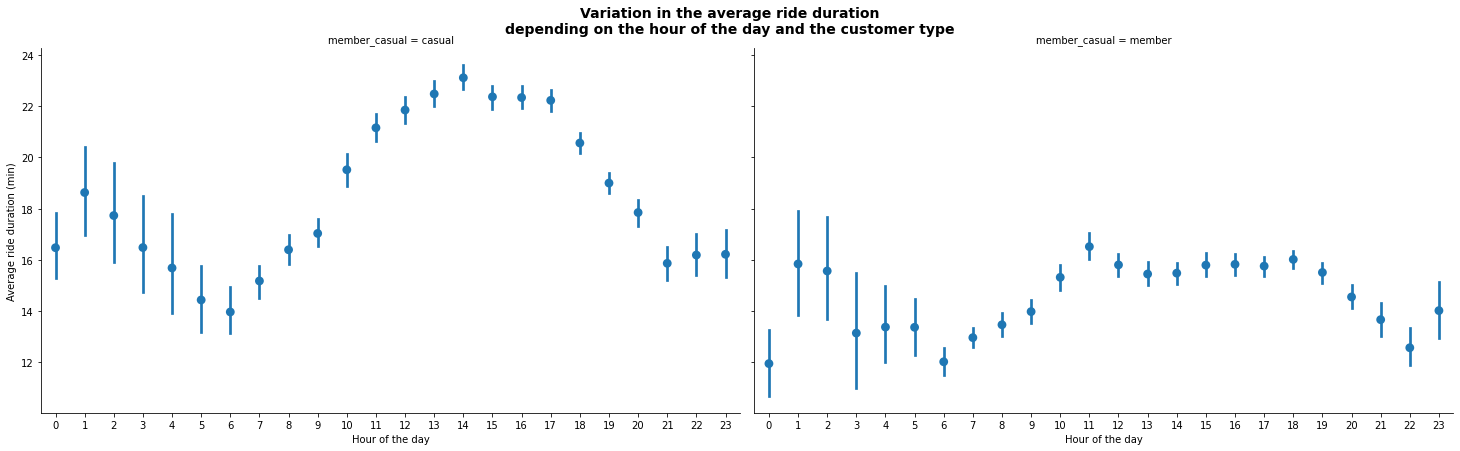

In [37]:

g = sns.FacetGrid(data=df_clean, col='member_casual', 
                  height=6, aspect=1.7, margin_titles=True)
g.map(sns.pointplot, 'hour_of_day', 'ride_dur', linestyles='')
g.set_ylabels('Average ride duration (min)')
g.set_xlabels('Hour of the day')
plt.suptitle("Variation in the average ride duration\ndepending on the hour of the day and the customer type",
             y = 1.04, fontsize = 14, weight = "bold");

## Variation in the ride duration depending on the hour of the day and if it is weekend or not

As expected it seems that during the weekends the time spent biking is higher than during weekdays independet of the hour of the day. However, surprisingly, the variation during the hours of the day remain similar to the weekdays, this means most of the longer rides take place during the afternoon. I would have expected them to take place during the evening when the "night-life" takes place.  

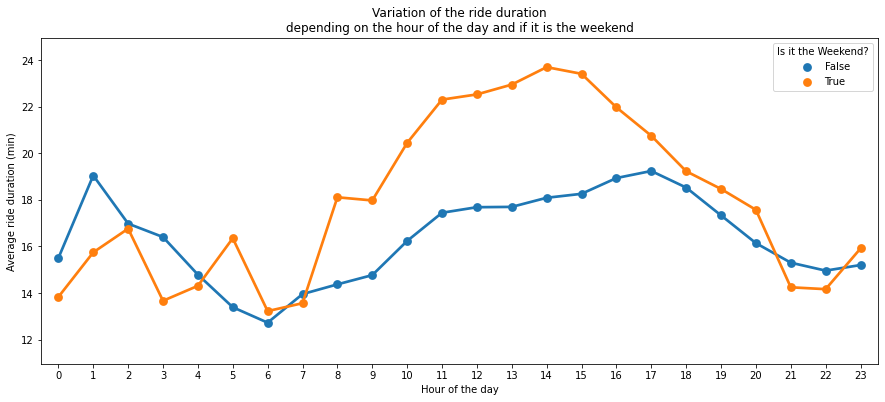

In [56]:
# take a look to changes in the ride duration depending on is_weekend and time of the day
plt.figure(figsize=[15,6])
g = sns.pointplot(data=df_clean, x='hour_of_day', y='ride_dur', hue='is_weekend', errwidth=0)
plt.ylabel('Average ride duration (min)')
plt.xlabel('Hour of the day')
plt.title('Variation of the ride duration\ndepending on the hour of the day and if it is the weekend')
plt.legend(title='Is it the Weekend?')
plt.show()

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!